In [1]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [2]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

### UPLOAD db_module.py

In [4]:
import db_module as dm

In [5]:
!ls -la

total 28
drwxr-xr-x 1 root root 4096 Aug 26 08:42 .
drwxr-xr-x 1 root root 4096 Aug 26 08:38 ..
drwxr-xr-x 4 root root 4096 Aug 13 13:34 .config
-rw-r--r-- 1 root root 1972 Aug 26 08:42 db_module.py
-rw-r--r-- 1 root root  116 Aug 26 08:41 mysql.json
drwxr-xr-x 2 root root 4096 Aug 26 08:42 __pycache__
drwxr-xr-x 1 root root 4096 Aug 13 13:35 sample_data


## 월별 매출/이익

In [6]:
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns=['월', '매출', '이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,5042600,367020
02,6756500,614320
03,5464100,548740
04,6445400,380780
05,5405300,564760
06,4118000,290770
07,4915900,546920
08,3070600,338140
09,7263400,527250


### 표

In [7]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,5042600,6756500,5464100,6445400,5405300,4118000,4915900,3070600,7263400,6566700,5600700,5129400,65778600
이익,367020,614320,548740,380780,564760,290770,546920,338140,527250,463820,353690,357290,5353500


### 그래프

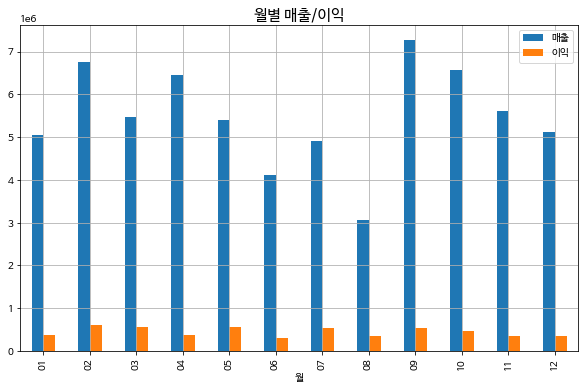

In [8]:
df.plot.bar(figsize=(10, 6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

## 거래처별 매출/이익

In [9]:
pd.options.display.float_format = '{:.2}'.format

### 표

In [10]:
results = dm.get_data_by_company(config)
df = pd.DataFrame(results, columns=['판매처', '매출', '이익'])
df.set_index('판매처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
판매처,,,
INTEL,16746000,1615050,9.6
NVIDIA,16326400,1346060,8.2
SAMSUNG,13939800,1076360,7.7
TSMC,11519400,689180,6.0
AMD,7247000,626850,8.6


### 그래프

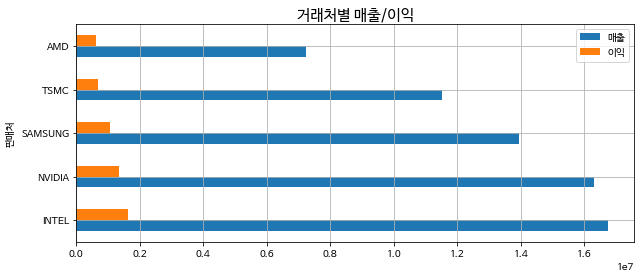

In [11]:
df[['매출', '이익']].plot.barh(rot=0, figsize=(10, 4))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

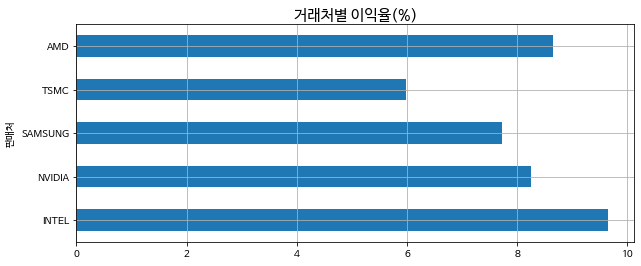

In [12]:
df['이익율'].plot.barh(rot=0, figsize=(10, 4))
plt.title('거래처별 이익율(%)', size=15)
plt.grid()
plt.show()

## 거래처별 판매제품/수량

### 표

In [13]:
results = dm.get_products_by_company(config)
df = pd.DataFrame(results, columns=['판매처', '상품', '수량'])
df.set_index(['판매처', '상품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

수량
판매처  상품          
AMD  1700X      6
     2700X      2
     3800X     22
     5600X     10
     990FX      3
...            ..
TSMC FX-8300   16
     RX580     27
     RX6800     3
     RX6900XT  13
     X570      31

[78 rows x 1 columns]

In [14]:
df.reset_index()['판매처'].unique()

array(['AMD', 'INTEL', 'NVIDIA', 'SAMSUNG', 'TSMC'], dtype=object)

### 그래프

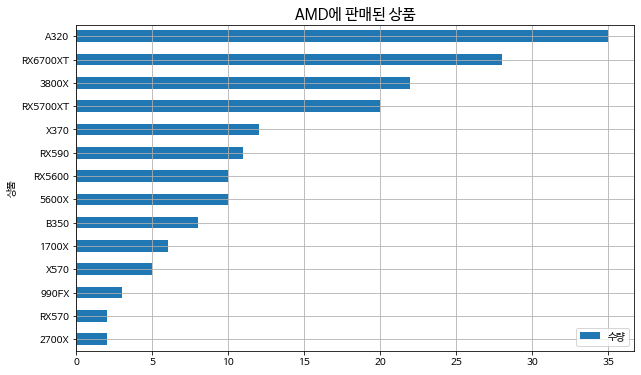

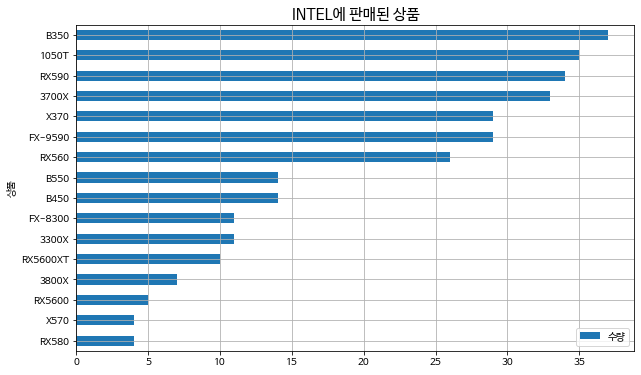

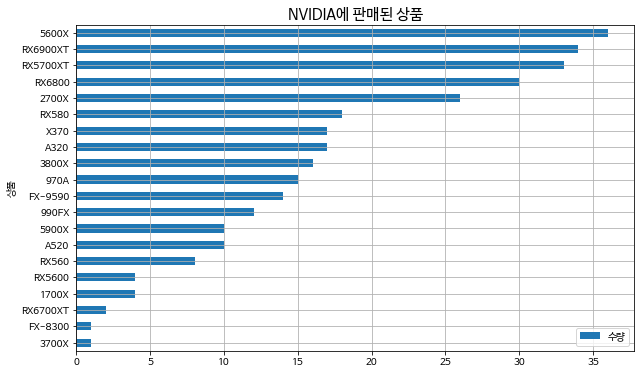

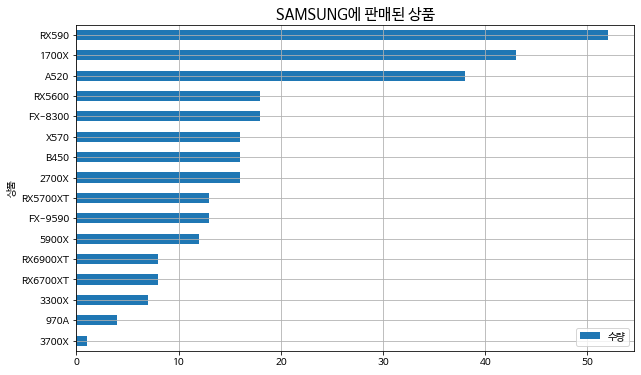

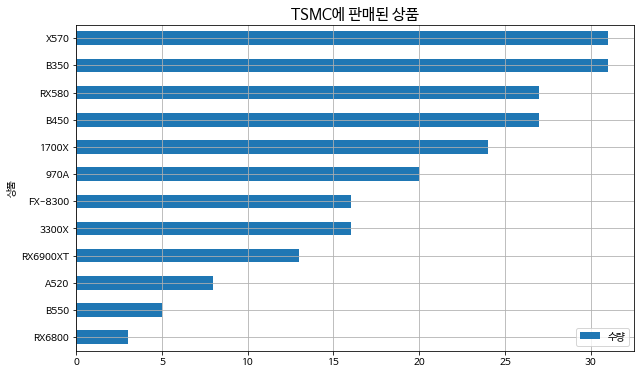

In [15]:
for company in df.reset_index()['판매처'].unique():
    sdf=df.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10, 6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

## 제품별 판매수량/매출/이익

### 표

In [16]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품', '수량', '매출', '이익'])
df.set_index('상품', inplace=True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,수량,매출,이익
상품,,,
1050T,35,3346000,301000
FX-8300,46,4498800,224940
FX-9590,56,3679200,404880
1700X,77,2718100,135520
2700X,44,594000,47520
3300X,34,1989000,119340
3700X,35,577500,57750
3800X,45,1692000,186300
5600X,46,2695600,377200


### 그래프

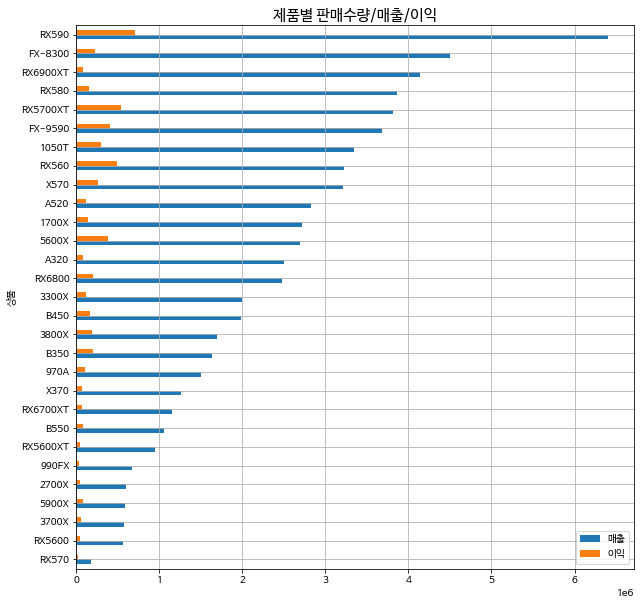

In [17]:
df[['매출', '이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('제품별 판매수량/매출/이익', size=15)
plt.grid()
plt.show()

## 카테고리별 매출/이익

### 표

In [18]:
results = dm.get_data_by_category(config)
df = pd.DataFrame(results, columns=['카테고리', '매출', '이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
카테고리,,,
CPU,22373200,1930130,8.6
GPU,26761800,2337990,8.7
MB,16643600,1085380,6.5


### 그래프

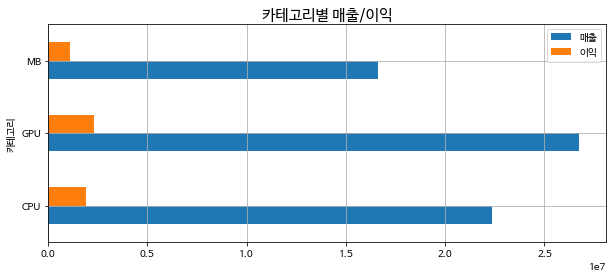

In [19]:
df[['매출', '이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
plt.show()